<a href="https://colab.research.google.com/github/CharlyPierce/Basico/blob/main/carburos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ejecutar por bloques en google colab cada bloque los separe por las lineas punteadas----------
# ------Calculo de minimos por seccion dorada y evaluacion en diferencias finitas para ver quef'(x)=0-------------------------
#Metodo de la seccion dorada o proporciones aureas
import sympy 
import time
import math
import random

class aurea:
  def __init__(self,f,x1):
    self.F=f
    self.x=x1#atributos
    self.au1=[]         #atributos
    self.i1=0
    self.phi=(1+math.sqrt(5))/2
    self.PMed=[]
  def ev(self,a,b,E):
    try:
      return ((math.log(E)-math.log(b-a)))/math.log(self.phi-1)
    except:
      return 0
  def func(self,F,x,x1):
    self.i1+=1
    return F.subs(x,x1)
  def algor(self,a,b,E):
    L=abs(b-a)#90
    T=self.phi-1#razon aurea
    x1=b-T*L
    x2=a+T*L
    ar=[a,b,x1,x2,self.F.subs(x,x1),self.F.subs(x,x2),L]
    #   0 1 2  3       4          5         6
    self.i1=0;i=0;
    a_in=time.time()
    while (ar[6]>E):
      if (ar[4]<ar[5]):#f(x1)<f(x2)
        ar=[ar[0],ar[3],ar[2],ar[2],ar[4],ar[4],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[2]=ar[1]-T*ar[6]#x1=b-T*L
        ar[4]=self.func(self.F,self.x,ar[2])
      else:
        ar=[ar[2],ar[1],ar[3],ar[3],ar[5],ar[5],ar[6]]
        ar[6]=abs(ar[1]-ar[0])#L=b-a
        ar[3]=ar[0]+T*ar[6]#x2=a+T*L
        ar[5]=self.func(self.F,self.x,ar[3])
      i+=1
    b_fi=time.time()
    self.au1.append(self.i1)
    print('\nFuncion: ',self.F)
    print('\nIntervalo',a,b)
    print('No de evaluaciones:',self.i1,'\nIteracion No:',i,'\nTiempo de ejecucion:',b_fi-a_in)
    print('El No de eval debe ser menor a ',self.ev(a,b,E),'≈',math.ceil(self.ev(a,b,E)),'\nEl valor esta entre',ar[0],ar[1])
    print('Punto medio:x*=',(ar[0]+ar[1])/2,'evaluacion en el optimo: f(x*)=',self.func(self.F,self.x,(ar[0]+ar[1])/2))
    print('Tamaño del último intervalo',ar[6],'error establecido:',E)
    print('El intervalo debe ser menor al error',ar[6],'<',E)
    self.PMed.append((ar[0]+ar[1])/2)
    return (ar[0]+ar[1])/2


class DF(aurea):
  def __init1__(self,x0,h=0.0001):
    self.H=h
    self.X0=x0
    self.T=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    print('\nDiferencias Finitas en el punto Xo:',self.X0)
    print('Adelante:',self.T[0],self.T[1])
    print('Centradas:',self.T[2],self.T[3])
    print('Atras:',self.T[4],self.T[5])


x=sympy.Symbol('x')
e=0.0005#Error
F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins=[0]*len(F1)
j=0
for i in a1:
  ins[j]=DF(F1[j],x)
  pm=ins[j].algor(i[0],i[1],e)
  ins[j].__init1__(pm)
  j+=1



Funcion:  7*x**4 + 2*x**3 + 3*x + 2

Intervalo -10 10
No de evaluaciones: 23 
Iteracion No: 23 
Tiempo de ejecucion: 0.0637044906616211
El No de eval debe ser menor a  22.020728047951778 ≈ 23 
El valor esta entre -0.5582909245021497 -0.5579788097688496
Punto medio:x*= -0.5581348671354996 evaluacion en el optimo: f(x*)= 0.657150273492312
Tamaño del último intervalo 0.0003121147333000618 error establecido: 0.0005
El intervalo debe ser menor al error 0.0003121147333000618 < 0.0005

Diferencias Finitas en el punto Xo: -0.5581348671354996
Adelante: 0.00178114192950218 0.000808070604874089
Centradas: 0.000807661820201311 0.000807798098134693
Atras: -0.000165818289099562 0.000808070700908381

Funcion:  7*x**4 + 2*x**3 + 3*x + 2/x**2

Intervalo -10 10
No de evaluaciones: 23 
Iteracion No: 23 
Tiempo de ejecucion: 0.061543941497802734
El No de eval debe ser menor a  22.020728047951778 ≈ 23 
El valor esta entre -0.804408361992723 -0.8040962472594229
Punto medio:x*= -0.804252304626073 evaluacion

In [ ]:
x=sympy.Symbol('x')
F1=[sympy.sympify(7*x**4+2*x**3+3*x+2),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
a1=[[-10,10],[-10,10],[-5,10],[-5,5],[-2,2]]
ins1=[0]*len(F1)
j=0
for i in a1:
  ins1[j]=F1[j]
  j1=sympy.diff(ins1[j])
  k=sympy.diff(j1)
  print(' F(x)=',ins1[j],'\n','F\'(x)=',j1,'\n','F\'(',ins[j].PMed[0],')=',j1.subs(x,ins[j].PMed[0]))
  print(' F\'\'(x)=',k,'\n','F\'\'(',ins[j].PMed[0],')=',k.subs(x,ins[j].PMed[0]),'\n')
  j+=1


 F(x)= 7*x**4 + 2*x**3 + 3*x + 2 
 F'(x)= 28*x**3 + 6*x**2 + 3 
 F'( -0.5581348671354996 )= 0.000807798098587220
 F''(x)= 84*x**2 + 12*x 
 F''( -0.5581348671354996 )= 19.4696021070124 

 F(x)= 7*x**4 + 2*x**3 + 3*x + 2/x**2 
 F'(x)= 28*x**3 + 6*x**2 + 3 - 4/x**3 
 F'( -0.804252304626073 )= 0.00434294594131401
 F''(x)= 84*x**2 + 12*x + 12/x**4 
 F''( -0.804252304626073 )= 73.3641699400848 

 F(x)= 2*x**3 + 3 
 F'(x)= 6*x**2 
 F'( -4.999810620407424 )= 149.988637439633
 F''(x)= 12*x 
 F''( -4.999810620407424 )= -59.9977274448891 

 F(x)= 3*sin(2*x + 1) 
 F'(x)= 6*cos(2*x + 1) 
 F'( -1.2853226764712344 )= 0.000905843111125301
 F''(x)= -12*sin(2*x + 1) 
 F''( -1.2853226764712344 )= 11.9999998632414 

 F(x)= 3*x**4 - 4*x**3 + 1 
 F'(x)= 12*x**3 - 12*x**2 
 F'( 0.9999591436509916 )= -0.000490236127131283
 F''(x)= 36*x**2 - 24*x 
 F''( 0.9999591436509916 )= 11.9980389553403 



In [ ]:
import sympy
class DF1:
  def __init__(self,f,x0,h=0.0001):
    self.F=f
    self.X0=x0
    self.H=h
    self.T=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0))/self.H
    self.T.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+2*self.H)+4*self.F.subs(x,self.X0+self.H)-3*self.F.subs(x,self.X0) )/(2*self.H)
    self.T.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-self.F.subs(x,self.X0-self.H))/(2*self.H)
    self.T.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+8*self.F.subs(x,self.X0+self.H)-8*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(12*self.H)
    self.T.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-self.F.subs(x,self.X0-self.H))/self.H
    self.T.append(a1)
    self.atras1()
  def atras1(self):
    a2= (3*self.F.subs(x,self.X0)-4*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H) )/(2*self.H)
    self.T.append(a2)
    print(self.T)

class DF2:
  def __init__(self,f,x0,h):
    self.F=f
    self.X0=x0
    self.H=h
    self.T2=[]
    self.delante()
  def delante(self):
    d1=(self.F.subs(x,self.X0+2*self.H)-2*self.F.subs(x,self.X0+self.H)+self.F.subs(x,self.X0))/(self.H)**2
    self.T2.append(d1)
    self.delante1()
  def delante1(self):
    d2= (-self.F.subs(x,self.X0+3*self.H)+4*self.F.subs(x,self.X0+2*self.H)-5*self.F.subs(x,self.X0+self.H)+2*self.F.subs(x,self.X0) )/(self.H)**2
    self.T2.append(d2)
    self.centrada()
  def centrada(self):
    c1= (self.F.subs(x,self.X0+self.H)-2*self.F.subs(x,self.X0)+self.F.subs(x,self.X0-self.H))/(self.H)**2
    self.T2.append(c1)
    self.centrada1()
  def centrada1(self):
    c2= (-self.F.subs(x,self.X0+2*self.H)+16*self.F.subs(x,self.X0+self.H)-30*self.F.subs(x,self.X0)+16*self.F.subs(x,self.X0-self.H)-self.F.subs(x,self.X0-2*self.H) )/(12*(self.H)**2)
    self.T2.append(c2)
    self.atras()
  def atras(self):
    a1= (self.F.subs(x,self.X0)-2*self.F.subs(x,self.X0-self.H)+self.F.subs(x,self.X0-2*self.H))/self.H**2
    self.T2.append(a1)
    self.atras1()
  def atras1(self):
    a2= (2*self.F.subs(x,self.X0)-5*self.F.subs(x,self.X0-self.H)+4*self.F.subs(x,self.X0-2*self.H)-self.F.subs(x,self.X0-3*self.H) )/self.H**2
    self.T2.append(a2)
    print(self.T2)

x=sympy.Symbol('x');e=0.0001;x0=-5
#7*x**4+2*x**3+3*x+2
F1=[sympy.sympify(2*x**3+3),sympy.sympify(7*x**4+2*x**3+3*x+(2/(x**2))),sympy.sympify(2*x**3+3),sympy.sympify(3*sympy.sin(2*x+1)),3*x**4-4*x**3+1]  
fun1=DF1(F1[0],x0,e)
fun2=DF2(F1[0],x0,e)
#xn=xn-fnu.__init__1(xn,error)


[149.997000019653, 149.999999958936, 150.000000019617, 149.999999999366, 150.003000019581, 149.999999958794]
[-59.9987856730877, -59.9999566475162, -59.9999992800804, -59.9999990432328, -60.0012157292440, -60.0000390704736]


In [ ]:
fun1.T[0]
fun2.T2[0]
xn=x0;i=0
print('xn:',xn)
while (i<15):
  xn=xn-(DF1(F1[0],xn,e).T[0]/DF2(F1[0],xn,e).T2[0])
  print('xn:',xn)
  i+=1

xn: -5
[149.997000019653, 149.999999958936, 150.000000019617, 149.999999999366, 150.003000019581, 149.999999958794]
[-59.9987856730877, -59.9999566475162, -59.9999992800804, -59.9999990432328, -60.0012157292440, -60.0000390704736]
xn: -2.49999940270569
[37.4984821016255, 37.4999820413535, 37.4999821012523, 37.4999820812771, 37.5014821008790, 37.4999820413002]
[-29.9987949148317, -29.9999982189547, -29.9999925346128, -29.9999922089474, -30.0011915754794, -29.9999904029846]
xn: -1.24999978745161
[9.37424683189914, 9.37499677176934, 9.37499683177245, 9.37499681177215, 9.37574683164577, 9.37499677177378]
[-14.9987974040755, -14.9999972887116, -14.9999974663473, -14.9999974885517, -15.0011974398012, -14.9999974219384]
xn: -0.624999890503078
[2.34337419883879, 2.34374913877122, 2.34374919877434, 2.34374917877589, 2.34412419870988, 2.34374913877788]
[-7.49879869310632, -7.49999866656026, -7.49999871096918, -7.49999878128330, -7.50119864001420, -7.49999862215134]
xn: -0.312499942879059
[0.5857

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
ds=pd.read_csv('Est.csv')
ds.tail(3)

,Año,Mes,Producto,Subproducto,Región,Valor (Mbd)
9400,2021,Agosto,Combustóleo Total,Combustóleo,Occidente,27.13
9401,2021,Agosto,Combustóleo Total,Combustóleo,Sur,83.17
9402,2021,Agosto,Combustóleo Total,Combustóleo,Sur,49.90


In [ ]:
pd.unique(ds['Región'])

array(['Centro', 'Golfo', 'Noreste', 'Occidente', 'Sur'], dtype=object)

In [ ]:
s1=ds.groupby(['Año','Producto']).sum()
s1.head(5)

Valor (Mbd)
Año  Producto                      
2015 Combustóleo Total      1532.14
     Diésel Total           3290.02
     Gasolina Total         4577.34
     Turbosina Total         283.71
2016 Combustóleo Total      2741.10

In [ ]:
CT=pd.DataFrame(columns=['año','valor'])
DT=pd.DataFrame(columns=['año','valor'])
GT=pd.DataFrame(columns=['año','valor'])
TT=pd.DataFrame(columns=['año','valor'])

In [ ]:
for i in range(len(s1['Valor (Mbd)'])):#tamaño 28 0-27
  a,b=s1.iloc[i].name#saco año y nombre ejemplo: '2021' 'gasolina total'
  c=s1['Valor (Mbd)'].iloc[i]#saco su valor
  if(b=='Combustóleo Total'):
    CT=CT.append({'año': int(a), 'valor':c }, ignore_index=True)    
  elif(b=='Diésel Total'):
    DT=DT.append({'año': int(a), 'valor':c }, ignore_index=True)
  elif(b=='Gasolina Total'):
    GT=GT.append({'año': int(a), 'valor':c }, ignore_index=True)
  else:
    TT=TT.append({'año': int(a), 'valor':c }, ignore_index=True)

Text(0, 0.5, 'Produccion')

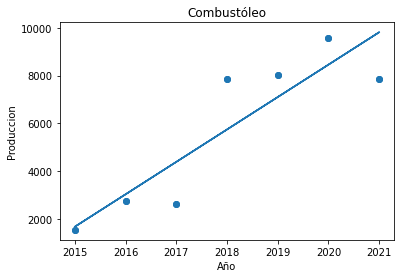

In [ ]:
def lin(CT):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v)
x,y,y_p=lin(CT)
plt.scatter(x,y)
plt.plot(x,y_p)
plt.title('Combustóleo')
plt.xlabel('Año')
plt.ylabel('Produccion')

Text(0, 0.5, 'Produccion')

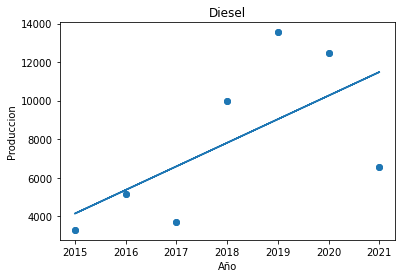

In [ ]:
def lin(CT):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v)
x,y,y_p=lin(DT)
plt.scatter(x,y)
plt.plot(x,y_p)
plt.title('Diesel')
plt.xlabel('Año')
plt.ylabel('Produccion')

Text(0, 0.5, 'Produccion')

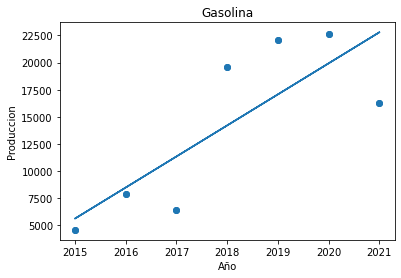

In [ ]:
def lin(CT):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v)
x,y,y_p=lin(GT)
plt.scatter(x,y)
plt.plot(x,y_p)
plt.title('Gasolina')
plt.xlabel('Año')
plt.ylabel('Produccion')

Text(0, 0.5, 'Produccion')

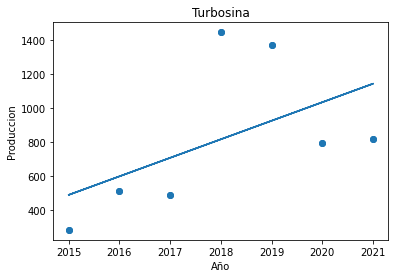

In [ ]:
def lin(CT):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v)
x,y,y_p=lin(TT)
plt.scatter(x,y)
plt.plot(x,y_p)
plt.title('Turbosina')
plt.xlabel('Año')
plt.ylabel('Produccion')

#Demanda

In [ ]:
ds=pd.read_csv('est_dem.csv')
s1=ds.groupby(['Año','Producto']).sum()
CT=pd.DataFrame(columns=['año','valor'])
DT=pd.DataFrame(columns=['año','valor'])
GT=pd.DataFrame(columns=['año','valor'])
for i in range(len(s1['Valor (Mbd)'])):#tamaño 28 0-27
  a,b=s1.iloc[i].name#saco año y nombre ejemplo: '2021' 'gasolina total'
  c=s1['Valor (Mbd)'].iloc[i]#saco su valor
  if(b=='Combustóleo'):
    CT=CT.append({'año': int(a), 'valor':c }, ignore_index=True)    
  elif(b=='Diésel'):
    DT=DT.append({'año': int(a), 'valor':c }, ignore_index=True)
  else:
    GT=GT.append({'año': int(a), 'valor':c }, ignore_index=True)

In [ ]:
x_v1=x_v+7
x_v1

array([[2022.],
       [2023.],
       [2024.],
       [2025.],
       [2026.],
       [2027.],
       [2028.],
       [2022.],
       [2023.],
       [2024.],
       [2025.],
       [2026.],
       [2027.],
       [2028.]])

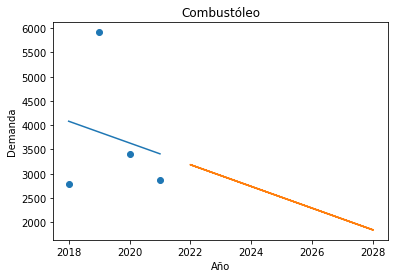

In [ ]:
def lin(CT,xv1):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v),lr.predict(x_v1)
x,y,y1,y_p=lin(CT,x_v1)
plt.scatter(x,y)
plt.plot(x,y1)
plt.plot(x_v1,y_p)
plt.title('Combustóleo')
plt.xlabel('Año')
plt.ylabel('Demanda')
plt.savefig("Combus.jpg")

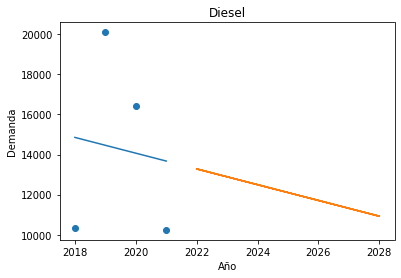

In [ ]:
def lin(CT,xv1):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v),lr.predict(x_v1)
x,y,y1,y_p=lin(DT,x_v1)
plt.scatter(x,y)
plt.plot(x,y1)
plt.plot(x_v1,y_p)
plt.title('Diesel')
plt.xlabel('Año')
plt.ylabel('Demanda')
plt.savefig("dies.jpg")

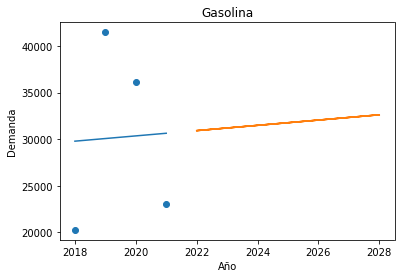

In [ ]:
def lin(CT,xv1):
  x_v=CT.iloc[:,0:1].values
  y_v=CT.iloc[:,1:2].values
  lr=LinearRegression()
  lr.fit(x_v,y_v)
  return x_v,y_v,lr.predict(x_v),lr.predict(x_v1)
x,y,y1,y_p=lin(GT,x_v1)
plt.scatter(x,y)
plt.plot(x,y1)
plt.plot(x_v1,y_p)
plt.title('Gasolina')
plt.xlabel('Año')
plt.ylabel('Demanda')
plt.savefig("gas.jpg")

_________________________________________________________________________________________________

Ayuda: Para ver q hacen las instrucciones

In [ ]:
s=ds.groupby(['Año','Mes','Producto']).sum()
s.head(5)

Valor (Mbd)
Año  Mes       Producto                      
2015 Agosto    Combustóleo Total       235.65
               Diésel Total            560.48
               Gasolina Total          785.44
               Turbosina Total          46.52
     Diciembre Combustóleo Total       241.62

In [ ]:
arr=np.array([[1,2,3]])
np.append(arr, [[1995,'hi',198]], axis=0)#axis eje opcionoal

array([['1', '2', '3'],
       ['1995', 'hi', '198']], dtype='<U21')

In [ ]:
mat = np.array([[1, 2, 3],[4, 5, 6]])
np.append(mat, [[11, 12, 13]], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [11, 12, 13]])

In [ ]:
s1.index.names[0],s1.index.names[1],s1.head(1).index[0][0],s1.head(1).index[0][1]

('Año', 'Producto', 2015, 'Combustóleo Total')

In [ ]:
s1['Valor (Mbd)'].iloc[0]

1532.1399999999999

In [ ]:
a,b=s1.iloc[0].name
a,b

(2015, 'Diésel Total')

In [ ]:
for i in range(28):
  a,b=s1.iloc[i].name
  print(int(b=='Combustóleo Total'),int(b=='Diésel Total'),int(b=='Gasolina Total'),int(b=='Turbosina Total'))

1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1


In [ ]:
int(True)

1